# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
from shapely.geometry import  LineString


In [2]:
# defining figuresize
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200

# function to flip across interface velocity
def reflected_hugo(x, interface_velocity):
    results = 2*interface_velocity-x
    return results 

# Import excel files

In [3]:
# Imporinting data

path_1 = "/Users/meera94/Downloads/MgO_hugo.xlsx" #MgO
path_2 = "/Users/meera94/Desktop/LCLS MEC LX99/MEC2022_code/MEC_XRD_VISAR/Impedance_matching/SLG_our_hugo.xlsx" #Our SLG

LiF_Hugoniot = pd.read_excel("LiF hugoniot.xlsx", header=0)
#SLG_Hugoniot = pd.read_excel("RenganathanSLG.xlsx", header=0)

#LiF_Hugoniot = pd.read_excel("/Users/meera94/Downloads/MgO_hugo.xlsx", header=0)
SLG_Hugoniot = pd.read_excel("/Users/meera94/Desktop/LCLS MEC LX99/MEC2022_code/MEC_XRD_VISAR/Impedance_matching/SLG_our_hugo.xlsx", header=0)

interface_velocity = 2.29

In [4]:
# Interpolating data

num_interp_points = 50000

x_LIF = np.linspace(min(LiF_Hugoniot['Up']), max(LiF_Hugoniot['Up']), num_interp_points)

y_LiF_interp = np.interp(x_LIF, LiF_Hugoniot["Up"], LiF_Hugoniot['P'])

x_SLG = np.linspace(min(SLG_Hugoniot['Up']), max(SLG_Hugoniot['Up']), num_interp_points)

y_SLG_interp = np.interp(x_SLG, SLG_Hugoniot["Up"], SLG_Hugoniot['P'])


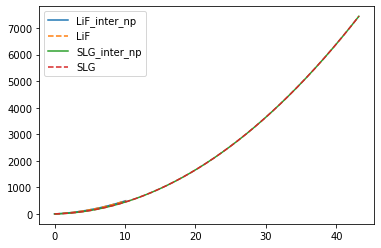

In [5]:
# Plotting interp data LIF and SLG
plt.plot(x_LIF, y_LiF_interp, label = "LiF_inter_np")
plt.plot(LiF_Hugoniot['Up'], LiF_Hugoniot["P"], '--', label = "LiF")
plt.plot(x_SLG, y_SLG_interp, label = "SLG_inter_np")
plt.plot(SLG_Hugoniot['Up'], SLG_Hugoniot["P"], '--', label = "SLG")
plt.legend()

## Calculating the intersectoin of vertical line with LiF

In [6]:
# Creating a vertical line at interface velocity for intersection
x_vertical =np.zeros(50000)+ interface_velocity
y_vertical = np.linspace(0,1400, 50000)

line_1 = LineString(np.column_stack((x_vertical, y_vertical)))
line_2 = LineString(np.column_stack((x_LIF, y_LiF_interp)))
intersection = line_1.intersection(line_2)

x_1, y_1 = intersection.xy



In [7]:
# Creating a horizontal line
x_horizontal = np.linspace(-30,30,50000)
y_horizontal = np.zeros(50000)+y_1

line_1 = LineString(np.column_stack((x_horizontal, y_horizontal)))
line_2 = LineString(np.column_stack((x_SLG, y_SLG_interp)))
intersection = line_1.intersection(line_2)

x_2, y_2 = intersection.xy

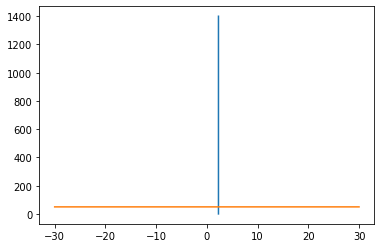

In [8]:
plt.plot(x_vertical,y_vertical)
plt.plot(x_horizontal,y_horizontal)
plt.show()

In [9]:
# shifting SLG on top of the LiF at the interface velocity

shift_value = x_2[0] - interface_velocity
x_shift_SLG = x_SLG - shift_value 

# flipped SLG
x_flip_SLG = reflected_hugo(x_shift_SLG, interface_velocity)


# Plotting the hugoniot

## Setting figure parameters

In [10]:
ticksize = {'xtick': 16, 'ytick': 16}
labelsize = {'xlabel': 20, 'ylabel': 20}

legendsize = 16

# Impedance matching

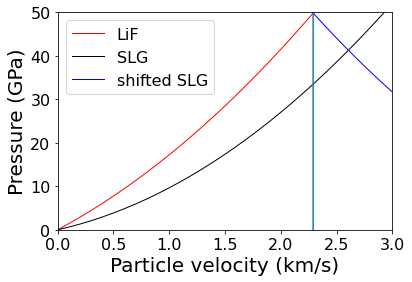

In [16]:

plt.plot(LiF_Hugoniot["Up"], LiF_Hugoniot["P"],
         label="LiF", color="red", linewidth=1)
plt.plot(SLG_Hugoniot["Up"], SLG_Hugoniot["P"],
         label="SLG", color="black", linewidth=1)
plt.plot(x_flip_SLG, y_SLG_interp, label ="shifted SLG", color="blue", linewidth = 1)
plt.plot(x_vertical,y_vertical)
plt.xticks(fontsize = ticksize["xtick"])
plt.yticks(fontsize = ticksize["ytick"])
plt.xlabel("Particle velocity (km/s)",fontsize = labelsize["xlabel"])
plt.ylabel("Pressure (GPa)",fontsize = labelsize["ylabel"])
plt.xlim(0,3)
plt.ylim(0,50)
plt.legend(fontsize = legendsize)
plt.show()


# Finding the window intersection

In [12]:
line_1 = LineString(np.column_stack((x_flip_SLG, y_SLG_interp)))
line_2 = LineString(np.column_stack((x_SLG, y_SLG_interp)))
intersection = line_1.intersection(line_2)

x_3, y_3 = intersection.xy


In [13]:
x_3, y_3

(array('d', [2.605712688182892]), array('d', [41.28330369566523]))